In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from textblob import TextBlob
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common.by import By


In [ ]:



Names = []
Ratings = []
Reviews = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9"
}


for page in range(1, 50):   

    url = f"https://www.flipkart.com/apple-iphone-15-black-128-gb/product-reviews/itm6ac6485515ae4?pid=MOBGTAGPTB3VS24W&page={page}"

    response = requests.get(url, headers=headers)
    print("Status:", response.status_code, "Page:", page)

    soup = BeautifulSoup(response.text, "html.parser")

    reviews = soup.find_all("div", class_="col x_CUu6 QccLnz")

    for r in reviews:
        name = r.find("p", class_="zJ1ZGa ZDi3w2")
        rating = r.find("div", class_="MKiFS6 ojKpP6")
        review = r.find("div", class_="G4PxIA")

        Names.append(name.get_text(strip=True) if name else None)
        Ratings.append(rating.get_text(strip=True) if rating else None)

        if review:
            Reviews.append(review.get_text(strip=True).replace("READ MORE", ""))
        else:
            Reviews.append(None)

    time.sleep(2)


flipkart_data = pd.DataFrame({
    "Name": Names,
    "Rating": Ratings,
    "Review": Reviews
})

print("Total reviews collected:", len(flipkart_data))

flipkart_data.to_csv("flipkart_reviews.csv", index=False)
print(" flipkart_reviews.csv")


In [6]:

flipkart_data= pd.read_csv("flipkart_reviews_final.csv")
flipkart_data

,Name,Rating,Review,Clean_Review,Polarity,Sentiment
0,Rishabh Jha,5.0,Awesome 🔥🔥☺️,awesome,1.000000,Positive
1,Akshay Meena,5.0,"So beautiful, so elegant, just a vowww😍❤️",so beautiful so elegant just a vowww,0.675000,Positive
2,Arunji Govindaraju,5.0,Awesome product very happy to hold this. Bette...,awesome product very happy to hold this better...,0.566667,Positive
3,Neeraj Chouhan,5.0,Amezing camera and all over best phone👌,amezing camera and all over best phone,1.000000,Positive
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,switch from oneplus to iphone i am stunned wit...,1.000000,Positive
...,...,...,...,...,...,...
266,Nitheesh P N,5.0,Superb.....,superb,1.000000,Positive
267,Ashok kumar,5.0,Great phone but still missing 90hz refresh rat...,great phone but still missing hz refresh rate ...,0.300000,Positive
268,Gopa B,5.0,Camera quality is very good,camera quality is very good,0.910000,Positive
269,Flipkart Customer,5.0,"Nyz phone ,Good battery backup.Overall value f...",nyz phone good battery backupoverall value for...,0.700000,Positive


In [7]:
flipkart_data.drop_duplicates(subset="Review", inplace=True)
print("After removing duplicates:", len(flipkart_data))


After removing duplicates: 271


In [8]:
flipkart_data.dropna(subset=["Review"], inplace=True)
print( len(flipkart_data))


271


In [ ]:
# import re

# def clean_text(text):
#     text = text.lower()                      # lowercase
#     text = re.sub(r"[^a-z\s]", "", text)     # remove punctuation
#     text = re.sub(r"\s+", " ", text).strip() # extra spaces
#     return text

# flipkart_data["Clean_Review"] = flipkart_data["Review"].apply(clean_text)
# flipkart_data

In [9]:

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
flipkart_data["Polarity"] = flipkart_data["Clean_Review"].apply(get_sentiment)


In [10]:
flipkart_data

,Name,Rating,Review,Clean_Review,Polarity,Sentiment
0,Rishabh Jha,5.0,Awesome 🔥🔥☺️,awesome,1.000000,Positive
1,Akshay Meena,5.0,"So beautiful, so elegant, just a vowww😍❤️",so beautiful so elegant just a vowww,0.675000,Positive
2,Arunji Govindaraju,5.0,Awesome product very happy to hold this. Bette...,awesome product very happy to hold this better...,0.566667,Positive
3,Neeraj Chouhan,5.0,Amezing camera and all over best phone👌,amezing camera and all over best phone,1.000000,Positive
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,switch from oneplus to iphone i am stunned wit...,1.000000,Positive
...,...,...,...,...,...,...
266,Nitheesh P N,5.0,Superb.....,superb,1.000000,Positive
267,Ashok kumar,5.0,Great phone but still missing 90hz refresh rat...,great phone but still missing hz refresh rate ...,0.300000,Positive
268,Gopa B,5.0,Camera quality is very good,camera quality is very good,0.910000,Positive
269,Flipkart Customer,5.0,"Nyz phone ,Good battery backup.Overall value f...",nyz phone good battery backupoverall value for...,0.700000,Positive


In [11]:
def sentiment_label(score):
    if score >= 0.1:
        return "Positive"
    else:
        return "Negative"

flipkart_data["Sentiment"] = flipkart_data["Polarity"].apply(sentiment_label)


In [12]:
flipkart_data.head(60)

,Name,Rating,Review,Clean_Review,Polarity,Sentiment
0,Rishabh Jha,5.0,Awesome 🔥🔥☺️,awesome,1.000000,Positive
1,Akshay Meena,5.0,"So beautiful, so elegant, just a vowww😍❤️",so beautiful so elegant just a vowww,0.675000,Positive
2,Arunji Govindaraju,5.0,Awesome product very happy to hold this. Bette...,awesome product very happy to hold this better...,0.566667,Positive
3,Neeraj Chouhan,5.0,Amezing camera and all over best phone👌,amezing camera and all over best phone,1.000000,Positive
4,Nikhil Kumar,5.0,Switch from OnePlus to iPhone I am stunned wit...,switch from oneplus to iphone i am stunned wit...,1.000000,Positive
5,Mousam Guha Roy,4.0,Very nice,very nice,0.780000,Positive
6,Flipkart Customer,5.0,Awesome photography experience. Battery backup...,awesome photography experience battery backup ...,0.733333,Positive
7,Ajin V,5.0,High quality camera😍,high quality camera,0.160000,Positive
8,Thakur Surya Pratap Singh,5.0,Awesome 😎,awesome,1.000000,Positive
9,Prithivi Boruah,5.0,Camera Quality Is Improved Loving It,camera quality is improved loving it,0.600000,Positive


In [13]:
print(flipkart_data["Sentiment"].value_counts())


Sentiment
Positive    232
Negative     39
Name: count, dtype: int64


In [14]:
flipkart_data.groupby("Sentiment")["Rating"].value_counts()


Sentiment  Rating
Negative   5.0        30
           3.0         5
           4.0         4
Positive   5.0       190
           4.0        35
           3.0         3
Name: count, dtype: int64

In [15]:
sentiment_percent = flipkart_data['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_percent)


Sentiment
Positive    85.608856
Negative    14.391144
Name: proportion, dtype: float64


In [16]:
flipkart_data['Polarity'].mean()

np.float64(0.4893802766997439)

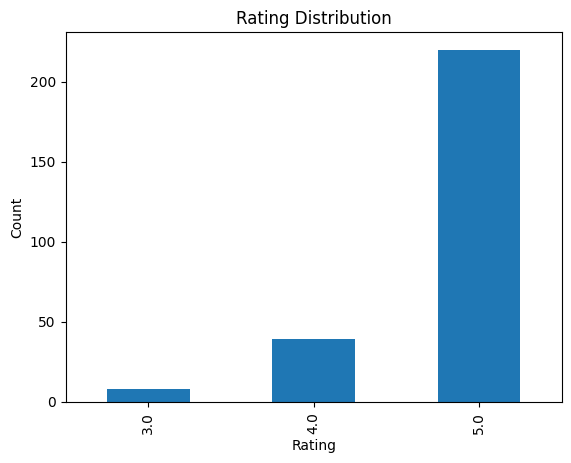

In [17]:
flipkart_data['Rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


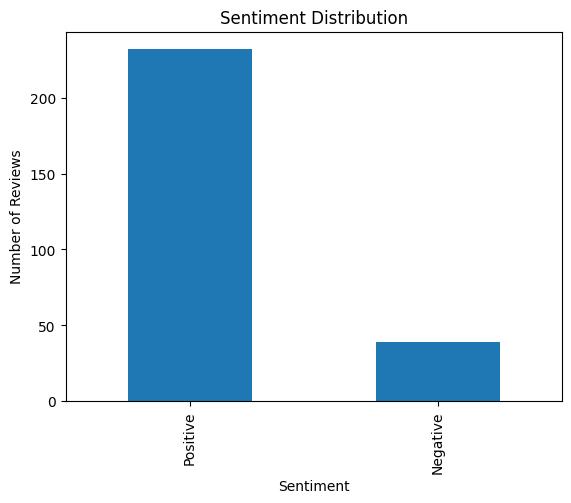

In [18]:
flipkart_data['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


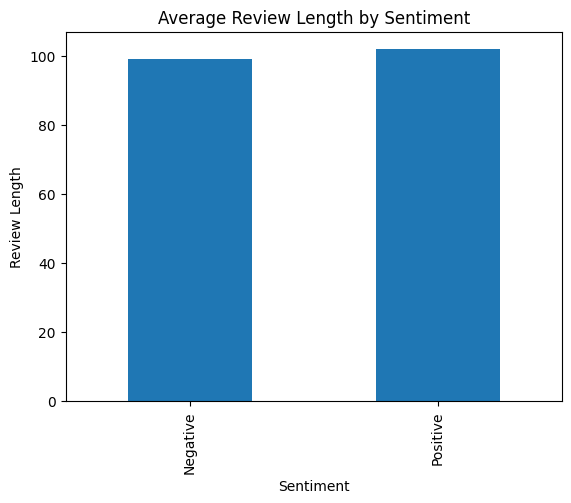

In [19]:
flipkart_data['Review_Length'] = flipkart_data['Review'].astype(str).apply(len)

flipkart_data.groupby('Sentiment')['Review_Length'].mean().plot(kind='bar')
plt.title("Average Review Length by Sentiment")
plt.ylabel("Review Length")
plt.show()


In [21]:
flipkart_data.to_csv("final_flipkart_sentiment.csv", index=False)
